In [40]:
import pandas as pd 
data=pd.read_csv('USA_Housing.csv')
data.shape

(5000, 7)

In [39]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


In [11]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


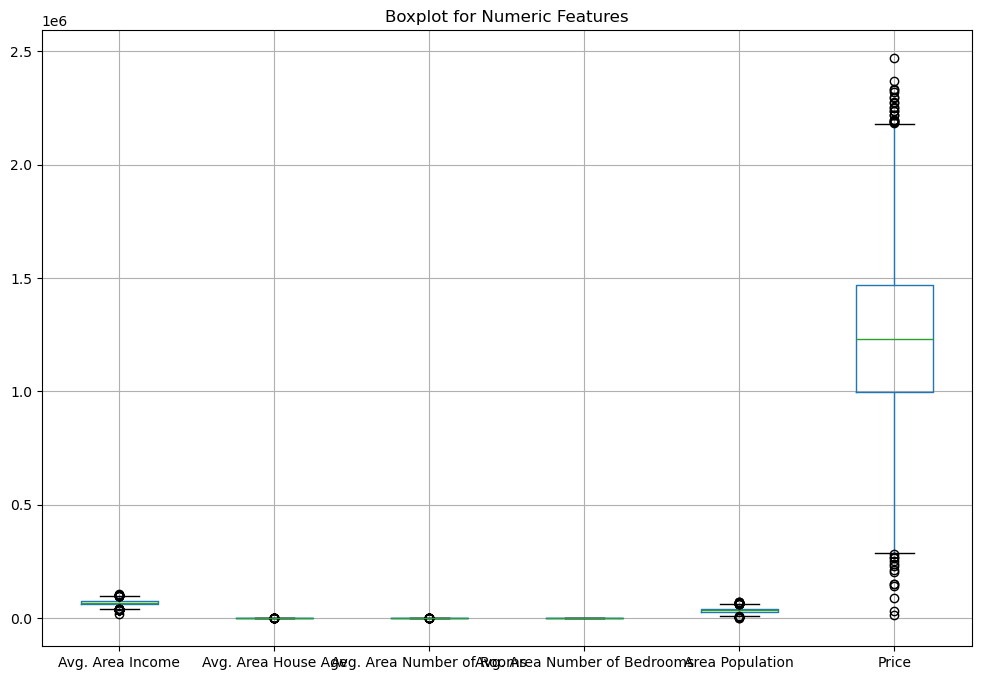

In [15]:
import matplotlib.pyplot as plt

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
data[numeric_columns].boxplot()
plt.title("Boxplot for Numeric Features")
plt.show()


In [33]:
import numpy as np

def detect_outliers_iqr(data):
    outlier_indices = {}
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = data[column].quantile(0.25)  
        Q3 = data[column].quantile(0.75)  
        IQR = Q3 - Q1  
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)].index
        outlier_indices[column] = outliers.tolist()
    
    return outlier_indices

outliers = detect_outliers_iqr(data)
for feature, indices in outliers.items():
    print(f"{feature}: {len(indices)} outliers")

Avg. Area Income: 32 outliers
Avg. Area House Age: 25 outliers
Avg. Area Number of Rooms: 24 outliers
Avg. Area Number of Bedrooms: 0 outliers
Area Population: 30 outliers
Price: 35 outliers


In [41]:
def remove_outliers_iqr_inplace(data, outlier_indices):
    # Flatten the list of all outlier indices to remove them all at once
    outlier_rows = []
    for indices in outlier_indices.values():
        outlier_rows.extend(indices)#Pour les collecter tous dans une seule liste, nous utilisons la méthode extend() pour ajouter chaque liste d'indices à outlier_rows. Cela "aplatis" le dictionnaire en une seule liste de tous les indices.
    
    # Convertir en un set pour éviter les doublons (set c'est une structure de donnee qui efface les doublons automatiquement et fait apparaitre l'idice qu'un seul fois)
    outlier_rows = set(outlier_rows)
    
    # Supprimer les lignes contenant des outliers directement dans le DataFrame
    data.drop(outlier_rows, axis=0, inplace=True, errors='ignore')
    
    return data

data = remove_outliers_iqr_inplace(data, outliers)

print(f"Taille apres suppression des outliers: {data.shape}")


Taille après suppression des outliers: (4865, 7)


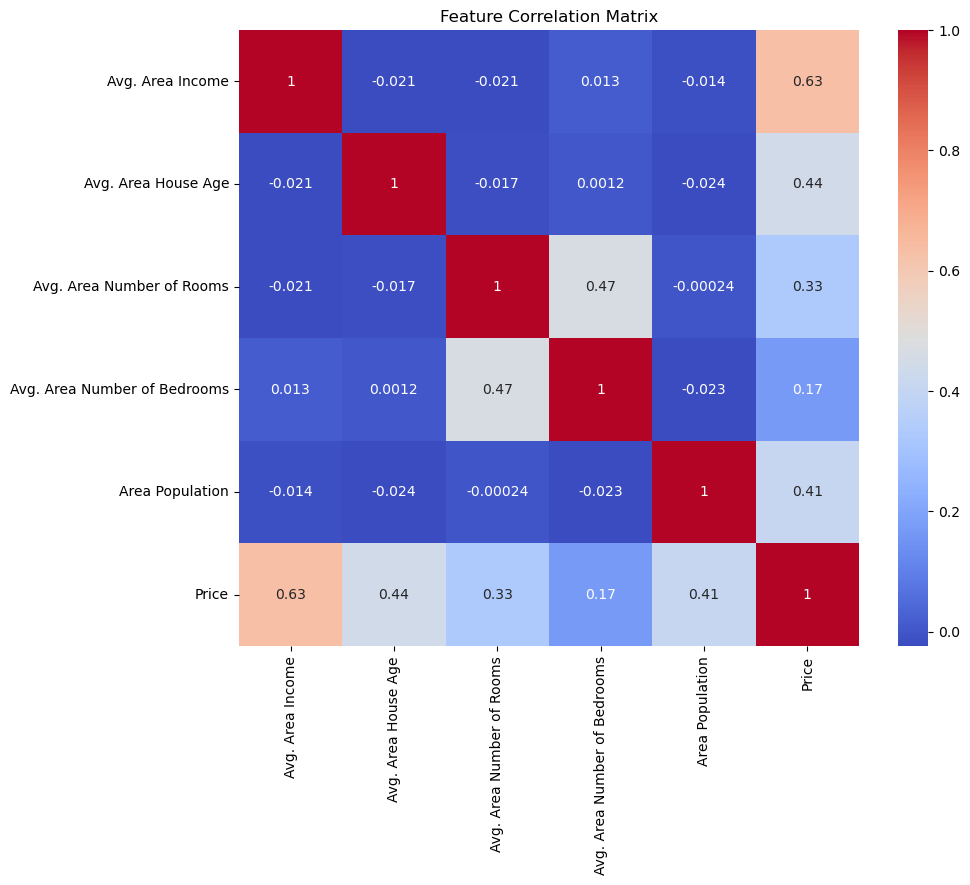

In [42]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

The target variable Price shows strong correlations with:
Avg. Area Income (0.64)
Avg. Area House Age (0.45)
Area Population (0.41)
Avg. Area Number of Rooms (0.34)
the target variable is the Price

In [44]:
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#standarScaller transorm les valeur pour avoir un moyenne de 0 et un ecart type de 1
# Créer un pipeline avec un seul transformateur : StandardScaler pipline pour chainee plusiurs transformation comme la normalisation et l'entainement 
pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

# Utilisation du pipeline pour normaliser les données d'entraînement et de test
X_train_scaled = pipeline.fit_transform(X_train)  # Appliquer fit_transform() à X_train
X_test_scaled = pipeline.transform(X_test)        # Appliquer transform() à X_test


In [49]:
print("Training set after scaling:\n", X_train_scaled[:5])
print("Testing set after scaling:\n", X_test_scaled[:5])


Training set after scaling:
 [[ 0.06255013 -0.09293175  0.1693158  -0.47760111  0.0979635 ]
 [-0.76001076  1.21478113 -0.72020501 -1.43804833 -1.02475454]
 [ 0.05675717  1.53285968  0.65477407  1.95607449 -0.89389209]
 [ 1.38987786 -0.08310984 -1.23958968  0.22238585  0.26893348]
 [ 0.10127733  1.68460966 -1.0577285  -1.61711477  0.08050071]]
Testing set after scaling:
 [[ 1.14898187 -0.52386034 -0.67310386  0.0514588  -0.16943048]
 [-0.58081973 -0.31732463 -0.1346439   0.20610709  0.04980072]
 [-0.22601541  0.13674507 -1.42255564  0.18982832 -0.48570347]
 [-0.35128595  1.38404418  0.62129891 -0.69736446 -1.37621155]
 [-0.08066614  2.19373439 -0.78617527 -1.25084252 -1.07764457]]


In [56]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train_scaled, y_train)


LinearRegression()

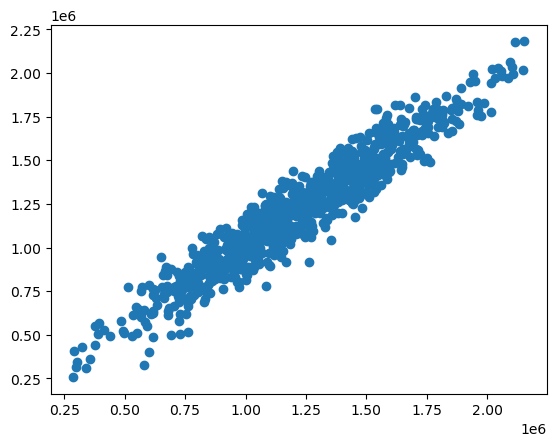

In [58]:
pred=lin_reg.predict(X_test)
plt.scatter(y_test,pred)

In [59]:
import numpy as np
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Fonction de validation croisée
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)  # Cross-validation avec 10 plis
    return pred.mean()  # Renvoie la moyenne des scores

# Fonction pour calculer le MAPE (Mean Absolute Percentage Error)
def mape_score(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100  # MAPE en pourcentage

# Fonction pour afficher les métriques d'évaluation
def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))  # Racine carrée de MSE
    mape = mape_score(true, predicted)  # Calcul du MAPE
    r2_square = metrics.r2_score(true, predicted)  # R2 Square
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('MAPE:', mape)
    print('R2 Square:', r2_square)
    print('__________________________________________')

# Fonction qui renvoie les métriques d'évaluation
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    mape = mape_score(true, predicted)
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, mape, r2_square


In [60]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n______________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n______________')
print_evaluate(y_train, train_pred)


Test set evaluation:
______________
MAE: 81137.45704516619
MSE: 10295321311.36869
RMSE: 101465.86278827323
MAPE: 7.3543505498928825
R2 Square: 0.9126986629438516
__________________________________________
Train set evaluation:
______________
MAE: 80921.16373101628
MSE: 10083105986.347572
RMSE: 100414.67017496782
MAPE: 7.31656774290506
R2 Square: 0.911537564238988
__________________________________________
